In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

Dataset is restaurant inspection data for LA county

In [2]:
inspections = pd.read_csv('inspections.csv')

In [3]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191371 entries, 0 to 191370
Data columns (total 20 columns):
activity_date          191371 non-null object
employee_id            191371 non-null object
facility_address       191371 non-null object
facility_city          191371 non-null object
facility_id            191371 non-null object
facility_name          191371 non-null object
facility_state         191371 non-null object
facility_zip           191371 non-null object
grade                  191371 non-null object
owner_id               191371 non-null object
owner_name             191371 non-null object
pe_description         191371 non-null object
program_element_pe     191371 non-null int64
program_name           190969 non-null object
program_status         191371 non-null object
record_id              191371 non-null object
score                  191371 non-null int64
serial_number          191371 non-null object
service_code           191371 non-null int64
service_descriptio

In [115]:
inspections.describe()

,program_element_pe,score,service_code
count,191371.000000,191371.000000,191371.000000
mean,1629.888980,93.753306,7.078246
std,9.391426,3.845518,48.932257
min,1610.000000,54.000000,1.000000
25%,1631.000000,91.000000,1.000000
50%,1632.000000,94.000000,1.000000
75%,1635.000000,97.000000,1.000000
max,1641.000000,100.000000,401.000000


In [4]:
inspections.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [5]:
inspections_filled = inspections.fillna('INACTIVE')

In [6]:
inspections_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191371 entries, 0 to 191370
Data columns (total 20 columns):
activity_date          191371 non-null object
employee_id            191371 non-null object
facility_address       191371 non-null object
facility_city          191371 non-null object
facility_id            191371 non-null object
facility_name          191371 non-null object
facility_state         191371 non-null object
facility_zip           191371 non-null object
grade                  191371 non-null object
owner_id               191371 non-null object
owner_name             191371 non-null object
pe_description         191371 non-null object
program_element_pe     191371 non-null int64
program_name           191371 non-null object
program_status         191371 non-null object
record_id              191371 non-null object
score                  191371 non-null int64
serial_number          191371 non-null object
service_code           191371 non-null int64
service_descriptio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153ad080>,
      dtype=object)

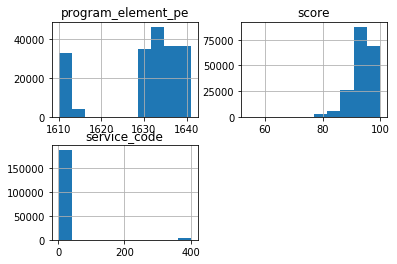

In [8]:
inspections.hist()

In [34]:
inspections.grade.unique()

array(['A', 'B', 'C', ' '], dtype=object)

In [94]:
inspections_grade = inspections.replace(to_replace='A', value=3)
inspections_grade = inspections_grade.replace(to_replace='B', value=2)
inspections_grade = inspections_grade.replace(to_replace='C', value=1)

In [95]:
inspections_grade.grade.unique()

array([3, 2, 1, ' '], dtype=object)

In [96]:
inspections_grade[inspections_grade.grade==' '].head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
766,2017-09-20,EE0000163,14021 S PIONEER BLVD,NORWALK,FA0177189,HIBACHI GRILL BUFFET,CA,90650,,OW0183147,CA HIBACHI BUFFET INC,RESTAURANT (151 + ) SEATS HIGH RISK,1641,HIBACHI GRILL BUFFET,ACTIVE,PR0170152,65,DAAJPSDX7,1,ROUTINE INSPECTION
891,2017-02-07,EE0000821,745 E GARVEY AVE STE 101,MONTEREY PARK,FA0166263,PHO BANH MI CHE CALI,CA,91755-3068,,OW0129433,BMCPHO MONTEREY PARK INC.,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO BANH MI CHE CALI,ACTIVE,PR0156516,67,DAQOIVOGA,1,ROUTINE INSPECTION
9002,2017-04-05,EE0000821,108 N GARFIELD AVE,MONTEREY PARK,FA0240496,EAST FUSION RESTAURANT,CA,91754,,OW0236578,"EAST FUSION RESTAURANT, INC.",RESTAURANT (61-150) SEATS HIGH RISK,1638,EAST FUSION RESTAURANT,ACTIVE,PR0188528,62,DAUF1RDDI,1,ROUTINE INSPECTION
11308,2016-09-21,EE0000854,3418 W 8TH ST,LOS ANGELES,FA0049645,STO. DOMINGO BAKERY,CA,90005,,OW0015350,HERNANDEZ ENRIQUE,RESTAURANT (0-30) SEATS HIGH RISK,1632,STO. DOMINGO BAKERY,ACTIVE,PR0038369,65,DAABC7FCZ,1,ROUTINE INSPECTION
14439,2015-09-10,EE0000882,2210 MARINE AVE STE J,GARDENA,FA0170261,FORTUNE CORNER CHINESE FOOD,CA,90249,,OW0178072,YUEDONG PENG,RESTAURANT (0-30) SEATS HIGH RISK,1632,CHINESE FOOD,INACTIVE,PR0160724,66,DAXAEXIJS,1,ROUTINE INSPECTION


In [97]:
inspections_cleaned = inspections_grade[inspections_grade.grade != ' ']

In [98]:
inspections_cleaned.grade.unique()

array([3, 2, 1], dtype=object)

In [99]:
inspections_cleaned['new_grade'] = inspections_cleaned.grade.apply(lambda x: float(x))

/Users/josephrmattis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191339 entries, 0 to 191370
Data columns (total 21 columns):
activity_date          191339 non-null object
employee_id            191339 non-null object
facility_address       191339 non-null object
facility_city          191339 non-null object
facility_id            191339 non-null object
facility_name          191339 non-null object
facility_state         191339 non-null object
facility_zip           191339 non-null object
grade                  191339 non-null object
owner_id               191339 non-null object
owner_name             191339 non-null object
pe_description         191339 non-null object
program_element_pe     191339 non-null int64
program_name           190937 non-null object
program_status         191339 non-null object
record_id              191339 non-null object
score                  191339 non-null int64
serial_number          191339 non-null object
service_code           191339 non-null int64
service_descriptio

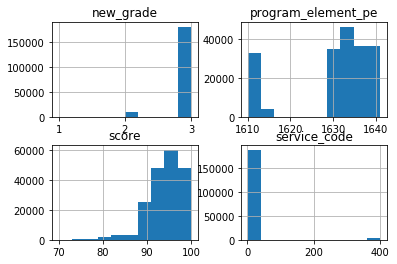

In [100]:
inspections_cleaned.hist()
inspections_cleaned.info()

Which cities have the worst resturant ratings?

In [108]:
inspections_cleaned.groupby('facility_city').mean().loc[:,'new_grade'].sort_values().head(10)

facility_city
LEONA VALLEY        2.500000
AVALON              2.690083
MONTEREY PARK       2.743746
WEST LOS ANGELES    2.750000
SIGNAL HILL         2.813765
WESTWOOD            2.833333
ALHAMBRA            2.851333
GORMAN              2.857143
LONG BEACH          2.866667
TERMINAL ISLAND     2.875000
Name: new_grade, dtype: float64

Which reviewers give the best and worst ratings?

In [114]:
inspections_cleaned.groupby('employee_id').mean().loc[:,'new_grade'].sort_values().head(10)
inspections_cleaned.groupby('employee_id').mean().loc[:,'new_grade'].sort_values(ascending=False).head(10)

employee_id
EE0000063    3.0
EE0000252    3.0
EE0000773    3.0
EE0000751    3.0
EE0000736    3.0
EE0000545    3.0
EE0000434    3.0
EE0000284    3.0
EE0000259    3.0
EE0000255    3.0
Name: new_grade, dtype: float64

In [ ]:
Do certain types of restaurants have worse scores?

In [116]:
inspections_cleaned.groupby('pe_description').mean().loc[:,'score'].sort_values().head(10)

pe_description
FOOD MKT RETAIL (2,000+ SF) HIGH RISK          92.506999
RESTAURANT (31-60) SEATS HIGH RISK             92.645707
RESTAURANT (61-150) SEATS HIGH RISK            92.714990
RESTAURANT (0-30) SEATS HIGH RISK              93.040390
RESTAURANT (151 + ) SEATS HIGH RISK            93.136178
RESTAURANT (0-30) SEATS MODERATE RISK          94.427591
FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK    94.431562
RESTAURANT (31-60) SEATS MODERATE RISK         94.473477
FOOD MKT RETAIL (25-1,999 SF) HIGH RISK        94.498991
RESTAURANT (151 + ) SEATS MODERATE RISK        94.545202
Name: score, dtype: float64

In [117]:
inspections_cleaned.groupby('pe_description').mean().loc[:,'score']

pe_description
FOOD MKT RETAIL (2,000+ SF) HIGH RISK          92.506999
FOOD MKT RETAIL (2,000+ SF) LOW RISK           95.446111
FOOD MKT RETAIL (2,000+ SF) MODERATE RISK      95.096421
FOOD MKT RETAIL (25-1,999 SF) HIGH RISK        94.498991
FOOD MKT RETAIL (25-1,999 SF) LOW RISK         96.051856
FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK    94.431562
RESTAURANT (0-30) SEATS HIGH RISK              93.040390
RESTAURANT (0-30) SEATS LOW RISK               95.715472
RESTAURANT (0-30) SEATS MODERATE RISK          94.427591
RESTAURANT (151 + ) SEATS HIGH RISK            93.136178
RESTAURANT (151 + ) SEATS LOW RISK             96.307359
RESTAURANT (151 + ) SEATS MODERATE RISK        94.545202
RESTAURANT (31-60) SEATS HIGH RISK             92.645707
RESTAURANT (31-60) SEATS LOW RISK              95.476954
RESTAURANT (31-60) SEATS MODERATE RISK         94.473477
RESTAURANT (61-150) SEATS HIGH RISK            92.714990
RESTAURANT (61-150) SEATS LOW RISK             95.680713
RESTAURANT (61-1

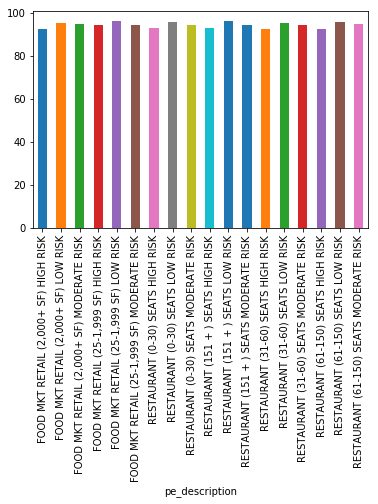

In [124]:
inspections_cleaned.groupby('pe_description').mean().loc[:,'score'].plot(kind='bar')

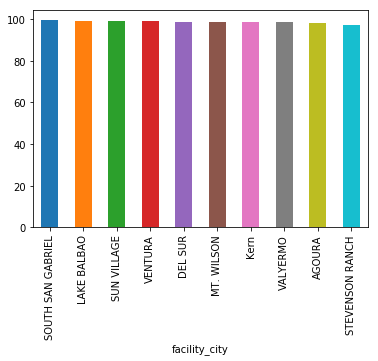

In [128]:
inspections_cleaned.groupby('facility_city').mean().loc[:,'score'].nsmallest(10).plot(kind='bar')
inspections_cleaned.groupby('facility_city').mean().loc[:,'score'].nlargest(10).plot(kind='bar')